<a href="https://colab.research.google.com/github/dedeepya-M/Face_recognition/blob/main/face_recogntion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 26 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=8f3a9529738475b6be0509718b9147dc2589b8f9b25d6b860e473a41c5ae21d5
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import face_recognition
import os
import cv2
from PIL import Image

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import glob

In [ ]:
image_path = '/content/gdrive/MyDrive/criminal1/criminal_images/'

In [ ]:
lis = os.listdir(image_path)
print(lis)

['yakub_memon.jpg', 'harshad_mehta.jpg', 'osama_bin_laden.jpg', 'dawood_ibrahim.jpg', 'anees_ibrahim.jpg', 'mashood_ajhar.jpg', 'veerappan.jpg', 'abu_saleem.jpg', 'major_iqbal.jpg', 'hafeez_muhammad_saeed.jpg']


In [ ]:
len(lis)

10

In [ ]:
images = []
names = []
for l in lis:
    curImg = cv2.imread(f'{image_path}/{l}')
    images.append(curImg)
    names.append(os.path.splitext(l)[0])
print(names)

['yakub_memon', 'harshad_mehta', 'osama_bin_laden', 'dawood_ibrahim', 'anees_ibrahim', 'mashood_ajhar', 'veerappan', 'abu_saleem', 'major_iqbal', 'hafeez_muhammad_saeed']


In [ ]:
len(images)

10

In [ ]:
len(names)

10

In [ ]:
print(names)

['yakub_memon', 'harshad_mehta', 'osama_bin_laden', 'dawood_ibrahim', 'anees_ibrahim', 'mashood_ajhar', 'veerappan', 'abu_saleem', 'major_iqbal', 'hafeez_muhammad_saeed']


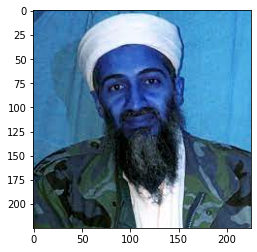

In [ ]:
plt.imshow(images[2])

In [ ]:
def encodings(img):
  enlist=[]
  for i in img:
      encode = face_recognition.face_encodings(i)[0]
      enlist.append(encode)
  return enlist

In [ ]:
knownlist = encodings(images)
print("encoding done")

encoding done


In [ ]:
def pred_img(p):
  x = np.array(p)
  x_code = face_recognition.face_encodings(x)[0]
  results = face_recognition.compare_faces(knownlist, x_code)
  return results

In [ ]:
l=[]
def crop(image):
  #im = face_recognition.load_image_file(image)
  face_locations = face_recognition.face_locations(image)
  for i in face_locations:
    top, right, bottom, left = i
    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    l.append(pil_image)
  return l

In [ ]:
def pred(path):
  f=face_recognition.load_image_file(path)
  crop_obj = crop(f)
  for i in crop_obj:
    print(pred_img(i))
    

In [ ]:
url = '/content/gdrive/MyDrive/criminal1/unknown_test.jpg'
pred(url)

[False, True, False, False, False, False, False, False, False, False]
